# Basic color based segmentation

In [76]:
%matplotlib inline
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [292]:
IMG_DIR = "images"
color_mean_dict = {"red":[140, 64, 61], "yellow":[135, 127, 52],"brown":[112, 84, 46],
                   "cyan":[54, 126, 118], "green":[50, 96, 42],"blue":[50, 70, 120],
                   "purple":[95, 52, 113]}
color_thres_dict = {"red":5, "yellow":5, "brown":5,
                   "cyan":5, "green":5, "blue":5,
                    "purple":5}

In [257]:
def rgb2hsv(color_string):
    [red, green, blue] = color_mean_dict[color_string]
    thres = color_thres_dict[color_string]
    
    color = np.uint8([[[blue, green, red]]])
    hsv_color = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    hue = hsv_color[0][0][0]
    
    low = max(0, hue - thres)
    high = min(360, hue + thres)
    lower_range = np.array([low, 50, 50], dtype=np.uint8)
    upper_range = np.array([high, 255, 255], dtype=np.uint8)
    
    return lower_range, upper_range
    

In [258]:
def color_detect(img, color="red"):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     low, high = rgb2hsv(237, 28, 36)
    low, high = rgb2hsv(color)

    print(low, high)
    
    mask = cv2.inRange(hsv_img, low, high)  
    
    return mask, img

In [259]:
img_names = [os.path.join(IMG_DIR, x) for x in os.listdir(IMG_DIR)] 

(array([12, 50, 50], dtype=uint8), array([ 22, 255, 255], dtype=uint8))


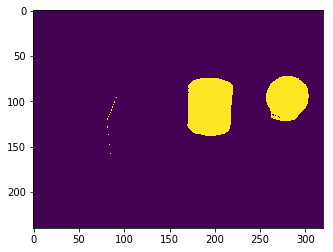

In [325]:
num = 2
color = "brown"
img = cv2.imread(img_names[num])
mask,img = color_detect(img,color)
plt.imshow(mask)

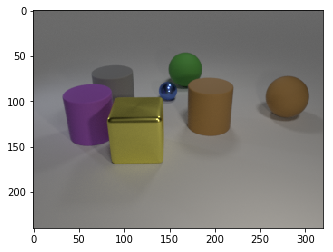

In [326]:
plt.imshow(img[...,::-1])